In [108]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    width = int(root.attrib['width'])
    height = int(root.attrib['height'])

    # Initialize an empty matrix
    matrix = np.zeros((height, width), dtype=int)
    #vector = np.zeros((height * width), dtype=int)

    # Process terrain
    terrain_data = root.find('terrain').text
    for i in range(height):
        for j in range(width):
            matrix[i, j] = int(terrain_data[i * width + j])
            #vector[i * width + j] = int(terrain_data[i * width + j])

    #print(vector)

    # Process units
    units = root.find('units')
    for unit in units.iter('rts.units.Unit'):
        unit_type = unit.attrib['type']
        player = int(unit.attrib['player'])

        x = int(unit.attrib['x'])
        y = int(unit.attrib['y'])

        if unit_type == 'Base':
            matrix[y, x] = player + 2  # Player bases represented by player + 2
        elif unit_type == 'Resource':
            matrix[y, x] = -1  # Resource tiles represented by -1
        elif unit_type == 'Worker':
            matrix[y, x] = player + 4  # Already built workers represented by player + 4
        elif unit_type == 'Barracks':
            matrix[y, x] = player + 6  # Barracks by player + 6
        elif unit_type == 'Light':
            matrix[y, x] = player + 8
        elif unit_type == 'Heavy':
            matrix[y, x] = player + 10
        elif unit_type == 'Ranged':
            matrix[y, x] = player + 12

    return matrix

In [125]:
#xml_file = "/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkers8x8Obstacle.xml"
#xml_file = "/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkersBarracks8x8.xml"
xml_file = "/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/melee8x8Mixed6.xml"
matrix = parse_xml(xml_file)
print(matrix)

[[12 10  8  0  0  0  0  0]
 [12 10  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9 11 13]
 [ 0  0  0  0  0  9 11 13]]


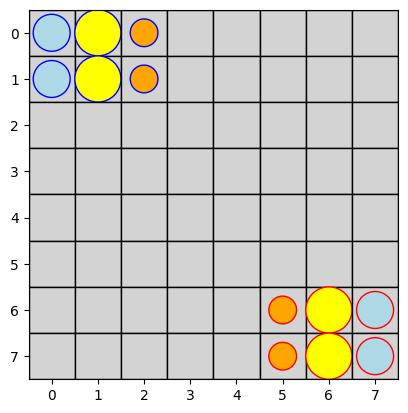

In [106]:
def plot_matrix(matrix):
    #cmap = plt.cm.Dark2
    #norm = plt.Normalize(matrix.min(), matrix.max())

    fig, ax = plt.subplots()
    ax.imshow(matrix)#, cmap=cmap)#), norm=norm)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 0:  # Empty tiles represented by 0
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
            elif matrix[i, j] == 1:  # Wall tiles represented by 1 
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='black')
                ax.add_patch(rect)
            elif matrix[i, j] == -1:  # Resource tiles represented by -1
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='darkgreen')
                ax.add_patch(rect)
            elif matrix[i, j] == 2:  # Player 1 base represented by 2
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='blue', facecolor='lightblue')
                ax.add_patch(rect)
            elif matrix[i, j] == 3:  # Player 2 base represented by 3
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='red', facecolor=(1.0, 0.8, 0.8, 1.0))
                ax.add_patch(rect)
            elif matrix[i, j] == 4:  # Player 1 worker represented by 4
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.2, fill=True, edgecolor='blue', facecolor='grey')
                ax.add_patch(circle)
            elif matrix[i, j] == 5:  # Player 2 worker represented by 5
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.2, fill=True, edgecolor='red', facecolor='grey')
                ax.add_patch(circle)
            elif matrix[i, j] == 6:  # Player 1 barracks represented by 6
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='blue', facecolor='grey')
                ax.add_patch(rect)
            elif matrix[i, j] == 7:  # Player 2 barracks represented by 7
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='red', facecolor='grey')
                ax.add_patch(rect)
            elif matrix[i, j] == 8:  # Player 1 light represented by 8
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.3, fill=True, edgecolor='blue', facecolor='orange')
                ax.add_patch(circle)
            elif matrix[i, j] == 9:  # Player 2 light represented by 9
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.3, fill=True, edgecolor='red', facecolor='orange')
                ax.add_patch(circle)
            elif matrix[i, j] == 10:  # Player 1 heavy represented by 10
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.5, fill=True, edgecolor='blue', facecolor='yellow')
                ax.add_patch(circle)
            elif matrix[i, j] == 11:  # Player 2 heavy represented by 11
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.5, fill=True, edgecolor='red', facecolor='yellow')
                ax.add_patch(circle)
            elif matrix[i, j] == 12:  # Player 1 ranged represented by 12
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.4, fill=True, edgecolor='blue', facecolor='lightblue')
                ax.add_patch(circle)
            elif matrix[i, j] == 13:  # Player 2 ranged represented by 13
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor='lightgrey')
                ax.add_patch(rect)
                circle = plt.Circle((j, i), 0.4, fill=True, edgecolor='red', facecolor='lightblue')
                ax.add_patch(circle)

    ax.set_aspect('equal', 'box')
    plt.xticks(range(matrix.shape[1]))
    plt.yticks(range(matrix.shape[0]))
    plt.show()

plot_matrix(matrix)

In [126]:
vector = matrix.flatten()
print(vector)


[12 10  8  0  0  0  0  0 12 10  8  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  9 11 13  0  0  0  0  0  9 11 13]


# Estimation of Distribution Algorithm

### Observations

In [127]:
from pathlib import Path

In [128]:
pathlist = Path("/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8").glob('**/*.xml')

vectors = []

for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    print(path_in_str)
    matrix = parse_xml(path_in_str)
    vector = matrix.flatten()
    vectors.append(vector)


/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/melee8x8Mixed6.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/melee8x8Mixed4.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/baseTwoWorkers8x8.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkers8x8Obstacle.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/bases8x8.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkers8x8A.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkersBarracks8x8.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkers8x8C.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkers8x8B.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/basesWorkers8x8F.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/microrts/maps/8x8/baseTwoWorkersMaxResources8x8.xml
/Users/gustavo/Repos/MicroRTS-Py/gym_microrts/mic

In [131]:
df = pd.DataFrame(vectors)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,12,10,8,0,0,0,0,0,12,10,...,11,13,0,0,0,0,0,9,11,13
1,0,0,0,0,0,0,0,0,0,10,...,11,0,0,0,0,0,0,0,0,0
2,-1,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,-1,0,0,0,0,0,0,0,0,4,...,5,0,0,0,0,0,0,0,0,-1
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
5,-1,0,0,0,0,0,0,0,0,4,...,5,0,0,0,0,0,0,0,0,-1
6,-1,0,0,0,6,0,0,0,0,4,...,5,0,0,0,0,7,0,0,0,-1
7,0,0,0,0,0,0,0,0,-1,4,...,5,-1,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,-1,4,...,5,-1,0,0,0,0,0,3,0,0
9,0,0,0,0,0,0,0,0,0,4,...,5,0,0,0,0,0,0,0,0,0


### Discretize

In [132]:
# Binary discretization
df_discr = df.copy()
for c in df.columns:
    df_discr[c]=pd.cut(df_discr[c],2,labels=[0,1])
df_discr

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1,1,1,0,0,1,1,0,1,1,...,1,1,0,1,1,0,1,1,1,1
1,0,0,0,0,0,1,1,0,0,1,...,1,0,0,1,1,0,1,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
8,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
9,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


### Re-sampling
n reamostragens
usar n >30
n=31, porque da pra separar bem as coisas
é um bom numero de começo

reamostrar tabelas com 500 valores (mesma quantidade que original)
boostraping

para dar robustez nos filogramas
e evitar o vies dos algoritmos de geraçao de filogramos

comentario: tecnica de monte carlo, busca no espaco

In [135]:
resampled_df_l = [df_discr]
for i in range(22):
  resampled_df_l += [df_discr.sample(n=df_discr.shape[0], replace=True)]

In [137]:
resampled_df_l[10]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
21,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
0,1,1,1,0,0,1,1,0,1,1,...,1,1,0,1,1,0,1,1,1,1
20,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
22,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [139]:
import os
from distutils.dir_util import mkpath

sheetname = '8x8'

resampledsource = os.path.join('./content/', sheetname)
mkpath(resampledsource)
for i, dfrs in enumerate(resampled_df_l):
  datasource = os.path.join(resampledsource, sheetname+str(i))
  mkpath(datasource)
  for v in dfrs.columns:
    fname = str(v).replace("/","-")
    with open(os.path.join(datasource,fname), "w") as f:
      f.write( str(dfrs[v]) )

### Filogram

### Consensus

### Probability Table

### Sampling

### Evaluate

### Ranking

Recapitulando

## 1. Tabela amostras TA

Dados observados = TA
1000 amostras


1.a Discretizar

rodar o MDL para avaliar qual a melhor quantidade de faixas para discretizar
discretizar em 2, 4, 8, 10 valores. MDL indica qual é o melhor número

1.b Ranquear (1/2 melhor)
usar 500 melhores para reamostrar


## 2. reamostragem de TA (embaralhar)
n reamostragens
usar n >30
n=31, porque da pra separar bem as coisas
é um bom numero de começo

reamostrar tabelas com 500 valores (mesma quantidade que original)
boostraping

para dar robustez nos filogramas
e evitar o vies dos algoritmos de geraçao de filogramos

comentario: tecnica de monte carlo, busca no espaco


## 3. Filogramas

## 4. Consensus

## 5. Tabela de probabilidade Conjunto por Grupo

## 6. Amostras de novas soluções

1000 amostras = TA nova
de acordo com o modelo de probabilidade

6.b des-discretizar

## 7. Avalia

Obter notas para cada amostra de acordo com os objetivos

k colunas de objetivos

análise de fronteiras para obter um método de avaliação

- para cada objetivo ver se quer maximizar ou minimizar
- fazer as fronteiras para todos os objetivos juntos


## 8. Ranqueia

Ordenar pela nota obtida


## 9. Re amostragem

Pegar a metade melhor

